# Adversarial Autoencoders

#### [Adversarial Autoencoders. Makhzani, 2015](https://arxiv.org/abs/1511.05644)
Performing variational inference by matching the aggregated posterior of the hidden code vector of the autoencoder with an **arbitrary prior** distribution.

Use this code with no warranty and please respect the accompanying license.

In [5]:
# Imports
%reload_ext autoreload
%autoreload 1

import os, sys
sys.path.append('../')
sys.path.append('../common')
sys.path.append('../GenerativeModels')

from tools_general import tf, np
from IPython.display import Image
from tools_train import get_train_params, OneHot, vis_square
from tools_config import data_dir
from tools_train import get_train_params, plot_latent_variable
import matplotlib.pyplot as plt
import imageio
from tensorflow.examples.tutorials.mnist import input_data
from tools_train import get_demo_data

In [6]:
# define parameters
networktype = 'AAE_MNIST'

work_dir = '../trained_models/%s/' %networktype
if not os.path.exists(work_dir): os.makedirs(work_dir)

## Network definitions

In [7]:
from AAE import create_encoder, create_decoder, create_aae_trainer

# Training AAE
You can either get the fully trained models from [google drive](https://goo.gl/7PrKD2) or train your own models using the AAE.py script.

# Experiments
Create demo networks and restore weights

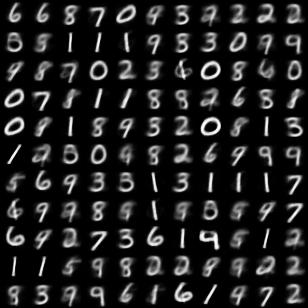

In [45]:
iter_num = 18018
best_model = work_dir + "Model_Iter_%.3d.ckpt"%iter_num
best_img = work_dir + 'Gen_Iter_%d.jpg'%iter_num
Image(filename=best_img)

In [46]:
latentD = 2 # of the best model trained
batch_size = 128

tf.reset_default_graph() 
demo_sess = tf.InteractiveSession()

is_training = tf.placeholder(tf.bool, [], 'is_training')

Zph = tf.placeholder(tf.float32, [None, latentD])
Xph = tf.placeholder(tf.float32, [None, 28, 28, 1])

Z_op = create_encoder(Xph, is_training, latentD, reuse=False, networktype=networktype + '_Enc') 
Xrec_op = create_decoder(Z_op, is_training, latentD, reuse=False, networktype=networktype + '_Dec')
Xgen_op = create_decoder(Zph, is_training, latentD, reuse=True, networktype=networktype + '_Dec')
    
tf.global_variables_initializer().run()

enc_varlist = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope=networktype + '_Enc')    
dec_varlist = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope=networktype + '_Dec')
saver = tf.train.Saver(var_list=enc_varlist+dec_varlist)
saver.restore(demo_sess, best_model)

Extracting ../data/train-images-idx3-ubyte.gz
Extracting ../data/train-labels-idx1-ubyte.gz
Extracting ../data/t10k-images-idx3-ubyte.gz
Extracting ../data/t10k-labels-idx1-ubyte.gz


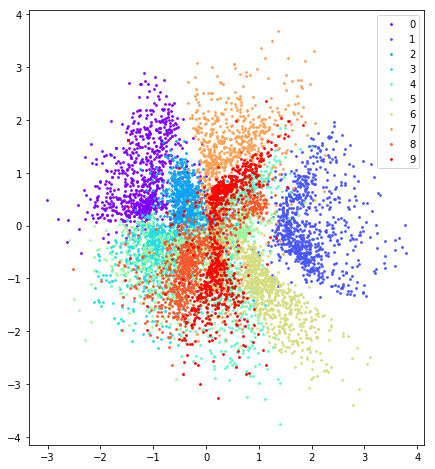

In [47]:
#Get uniform samples over the labels
spl = 800  # sample_per_label
data = input_data.read_data_sets(data_dir, one_hot=False, reshape=False)
Xdemo, Xdemo_labels = get_demo_data(data, spl)

decoded_data = demo_sess.run(Z_op, feed_dict={Xph:Xdemo, is_training:False})
plot_latent_variable(decoded_data, Xdemo_labels)

### Generate new data
Approximate samples from the posterior distribution over the latent variables p(z|x)

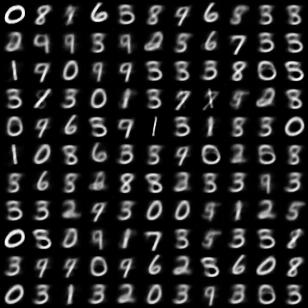

In [40]:
Zdemo = np.random.normal(size=[128, latentD], loc=0.0, scale=1.).astype(np.float32)

gen_sample = demo_sess.run(Xgen_op, feed_dict={Zph: Zdemo , is_training:False})
vis_square(gen_sample[:121], [11, 11], save_path=work_dir + 'sample.jpg')
Image(filename=work_dir + 'sample.jpg')